# Netflix Movies - EDA

In [1]:
# Netflix Movies

# Data Preparation and cleaning
## Loading data using Pandas
## Analyse data and columns
## Dealing with the missing values




## Importing neccessary libraries and loading Data


In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('D://Python/netflix_titles.csv')

In [11]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:

df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [15]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Data Preparation and Cleaning

### Missing Values

In [19]:
#missing values
missing = df.isna().sum().sort_values(ascending = False)

#2.3k director names are missing


In [20]:
missing_per = missing/len(df)

In [21]:
missing_per

director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
rating          0.000899
description     0.000000
listed_in       0.000000
duration        0.000000
release_year    0.000000
title           0.000000
type            0.000000
show_id         0.000000
dtype: float64

In [22]:
len(df)

7787

In [24]:
missing_per[missing_per !=0]

director      0.306793
cast          0.092205
country       0.065109
date_added    0.001284
rating        0.000899
dtype: float64

### Dropping 'director' field as it as its 30% values are missing.

In [59]:

df= df.drop(['director'], axis = 1)

In [62]:
df.head()
df.isna().sum().sort_values(ascending = False)

cast            718
country         507
date_added       10
rating            7
description       0
listed_in         0
duration          0
release_year      0
title             0
type              0
show_id           0
dtype: int64

### Filling missing values in 'cast' field with "unknown"

In [64]:

df.cast.fillna("unknown", inplace = True)

In [65]:
df.cast.isna().sum()

0

### Filling missing values in 'country' field as "NA"

In [71]:

df.country.fillna("NA", inplace = True)

In [67]:
df.isna().sum().sort_values(ascending = False)

date_added      10
rating           7
description      0
listed_in        0
duration         0
release_year     0
country          0
cast             0
title            0
type             0
show_id          0
dtype: int64

In [74]:
df.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [75]:
#most the values in rating field is "TV-MA", using this value to fill missing values.
df.rating.fillna("TV-MA", inplace = True)

In [76]:
df.isna().sum().sort_values(ascending = False)

date_added      10
description      0
listed_in        0
duration         0
rating           0
release_year     0
country          0
cast             0
title            0
type             0
show_id          0
dtype: int64

In [77]:
df.date_added.value_counts()

January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
December 6, 2017       1
November 7, 2014       1
March 28, 2017         1
February 4, 2017       1
December 5, 2014       1
Name: date_added, Length: 1565, dtype: int64

### most the values in date_added field is "January 1 , 2020". using this value to fill missing values.

In [78]:

df.date_added.fillna("January 1 , 2020", inplace = True)

In [79]:
df.isna().sum().sort_values(ascending = False)


description     0
listed_in       0
duration        0
rating          0
release_year    0
date_added      0
country         0
cast            0
title           0
type            0
show_id         0
dtype: int64

## Exploratory Data Analysis and Visualization
### Columns to Analyse:
#### 1. Type
#### 2. Country
#### 3. Rating

In [80]:
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [82]:
df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [83]:
df.country.value_counts()

United States                                    2555
India                                             923
unknown                                           507
United Kingdom                                    397
Japan                                             226
                                                 ... 
United Kingdom, Spain, United States, Germany       1
France, Malta, United States                        1
United Kingdom, Russia                              1
Taiwan, China, France, United States                1
South Africa, Angola                                1
Name: country, Length: 682, dtype: int64

In [89]:
#replacing "unknown" values in country field to "united states"
df['country'].replace(to_replace = "unknown", value = "United States", inplace = True)

In [95]:
countries = df.country.value_counts().head(10)   #top 10 countries

C:\Users\praka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Country')

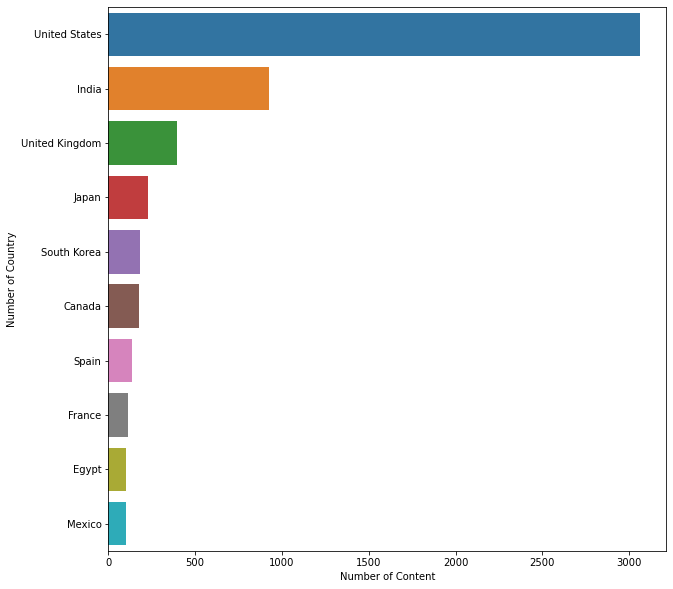

In [96]:
plt.figure(figsize=(10,10))
ax=sns.barplot(countries.values, countries.index)
ax.set_xlabel("Number of Content")
ax.set_ylabel("Number of Country")

In [ ]:
#United states and India are the top contributors

In [121]:
x= df.rating.value_counts()
x

TV-MA       2870
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

C:\Users\praka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


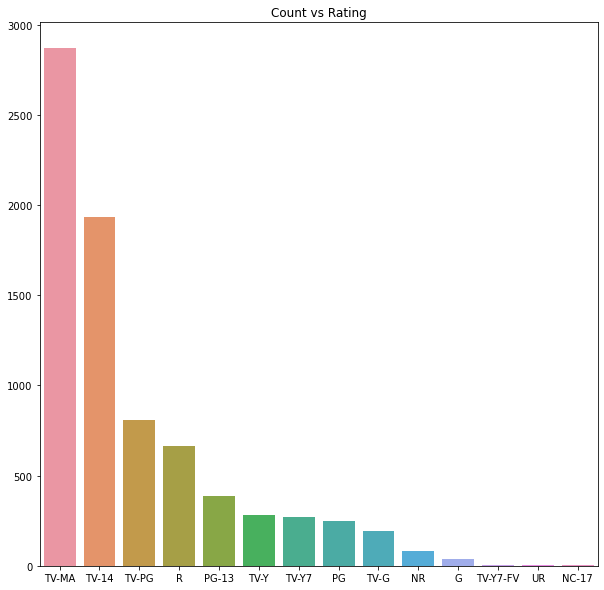

In [130]:
plt.figure(figsize=(10,10))
ax=sns.barplot(x.index, x.values).set(title='Count vs Rating')


In [ ]:
#TV-MA is highly watched followed by TV-14 and TV-PG.

In [137]:
y = df.type.value_counts()
y

Movie      5377
TV Show    2410
Name: type, dtype: int64

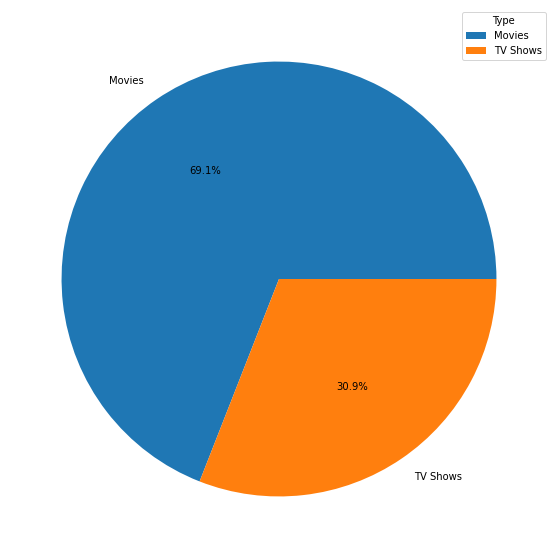

In [141]:
plt.figure(figsize=(10,10))
plt.pie(y.values,labels=["Movies","TV Shows"],autopct="%1.1f%%")
plt.legend(title = 'Type')
plt.show()

In [145]:

z= df.release_year.value_counts().head(20)
z

2018    1121
2017    1012
2019     996
2016     882
2020     868
2015     541
2014     334
2013     267
2012     219
2010     173
2011     166
2009     137
2008     125
2006      85
2007      85
2005      73
2004      59
2003      49
2002      45
2001      36
Name: release_year, dtype: int64

C:\Users\praka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


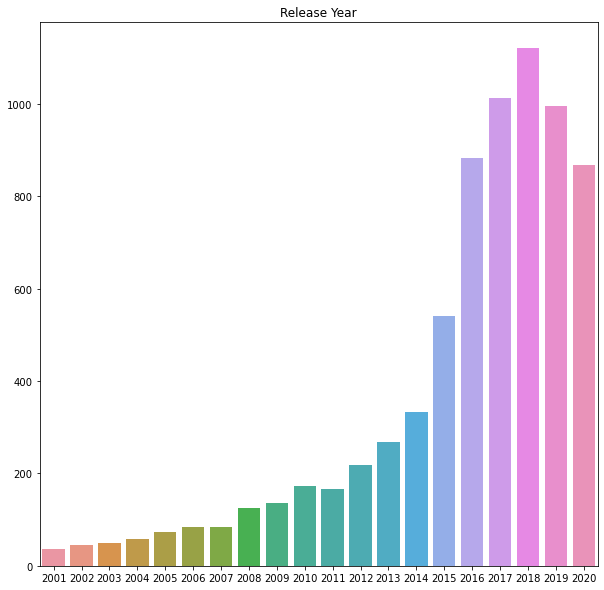

In [147]:
plt.figure(figsize=(10,10))
ax = sns.barplot(z.index, z.values).set_title('Release Year')




In [ ]:
#Most of Netflix contents are released in the year of 2018,2017,2019,2016 and 2020 respectively. 

In [160]:
a



0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7787, dtype: object

In [178]:
# Splitting year from date_added field to create new column.
df["year"]= df.date_added.apply(lambda x: str(x).split(",")[-1]).sort_values(ascending = False)

In [207]:
a= df.year.value_counts().head(10)

C:\Users\praka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


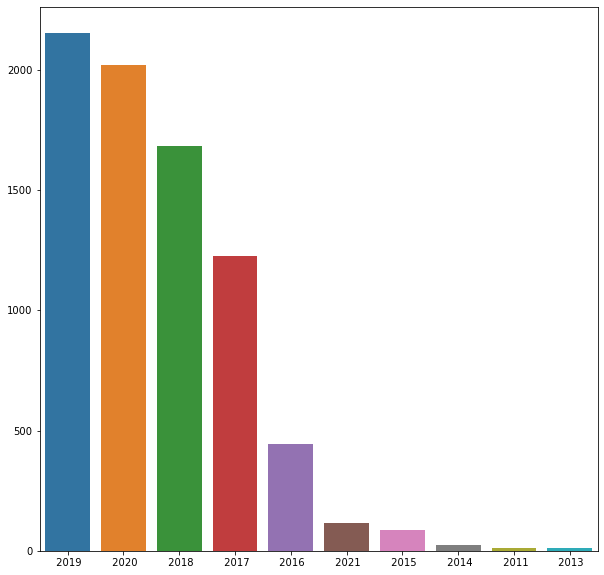

In [208]:
#contents added to netflix over the years
plt.figure(figsize = (10,10))
ax= sns.barplot(a.index, a.values)

In [ ]:
#Highest number of contents added in 2019, 2020 and 2018 respectively.

NameError: name 'Plt' is not defined

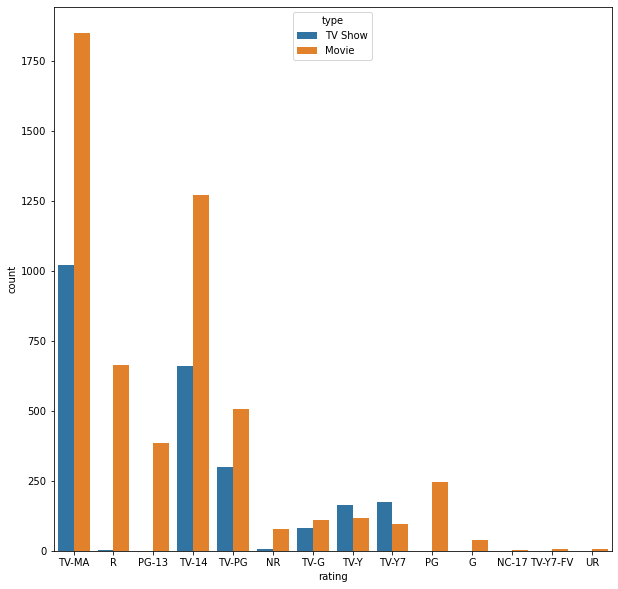

In [211]:
plt.figure(figsize= (10,10))
sns.countplot(x = 'rating', hue='type', data = df)
Plt.show()

NameError: name 'Plt' is not defined

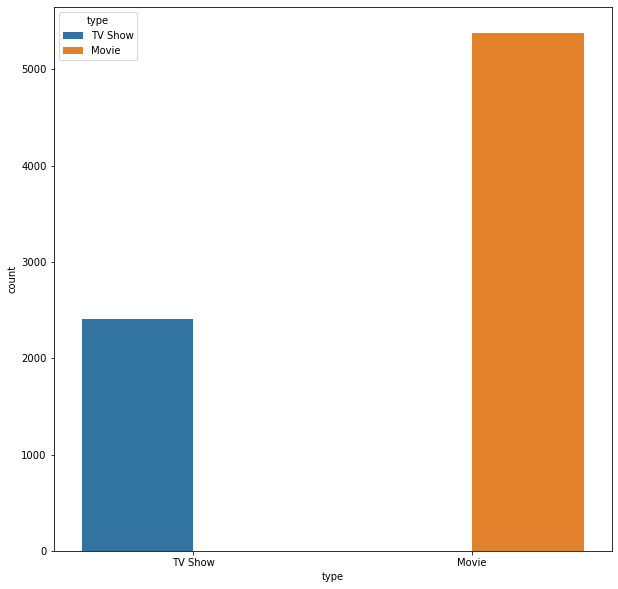

In [212]:
plt.figure(figsize= (10,10))
sns.countplot(x = 'type', hue='type', data = df)
Plt.show()

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   cast          7787 non-null   object
 4   country       7787 non-null   object
 5   date_added    7787 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7787 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
 11  year          7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [210]:
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020


In [50]:
type(date_added)

pandas.core.series.Series

In [51]:
df.date_added[0]

'August 14, 2020'

In [53]:
type(df.release_year)

pandas.core.series.Series

In [ ]:
titl

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Summary and Conclusion:
### 1. United states and India are the top contributors
### 2. TV-MA is highly watched followed by TV-14 and TV-PG.
### 3. Most of Netflix contents are released in the year of 2018,2017,2019,2016 and 2020 respectively.
### 4. Highest number of contents added in 2019, 2020 and 2018 respectively.